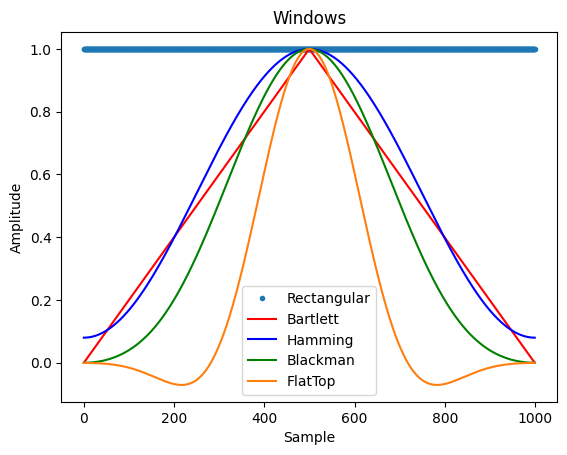

C:\Users\Guilleromo\AppData\Local\Temp\ipykernel_2044\2559747498.py:61: RuntimeWarning: divide by zero encountered in log10
  FFT_Rectangular_log = 20*np.log10(np.abs(FFT_Rectangular)/np.abs(FFT_Rectangular[0]))
C:\Users\Guilleromo\AppData\Local\Temp\ipykernel_2044\2559747498.py:62: RuntimeWarning: divide by zero encountered in log10
  FFT_Bartlett_log = 20*np.log10(np.abs(FFT_Bartlett)/np.abs(FFT_Bartlett[0]))


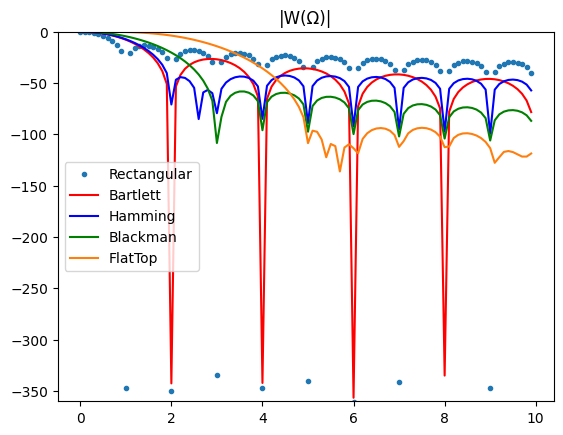

,$Ω0$,$Ω1$,$W2$
Rectangular,0,0.43,350
Bartlett,0,0.63,356
Hann,0,0.65,99.4
Blackman,0,0.8,108
Flat-top,0,1.86,136


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 19 19:36:22 2022


@author: Guillermo Daniel Spagnolo
         daniespagnolo@frba.utn.edu.ar
"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from pandas import DataFrame
from IPython.display import HTML

# import matplotlib as mpl


#a) Para cada ventana grafique w(k) y |W(Ω)|, para N = 1000 muestras, normalizando w(k) de forma tal que la amplitud máxima de |W(Ω)| (lóbulo principal) sea 0 dB.
realizaciones=200#200 senoidales con 200 frec dif
N  = 1000
fs = 1000
ts = 1/fs
Δf = fs/N # resolución espectral Δf
tt = np.linspace(0,(N-1)*ts,N)# rango de 0 a 999*0.001 de 1000 muestras
Amplitud = 2
Wbins = 3
zerospadding =9
n = np.arange(0, (N-1))#rango de 0 a 999

# ------WINDOWS----------w(k) Ventanas
Rectangular = np.ones(N)#Rectangular
Bartlett = sig.windows.bartlett(N).reshape(N,1)#perform Bartlett's test  
Hamming  = sig.windows.hamming(N)
Blackman = sig.windows.blackman(N)
FlatTop  = sig.windows.flattop(N)

# ------PLOTEO WINDOWS----------
plt.figure(1)
plt.title("Windows")
plt.ylabel("Amplitude");plt.xlabel("Sample")
plt.plot(Rectangular,".",Bartlett,'r',Hamming,"b",Blackman,"g",FlatTop,"-")
plt.legend(["Rectangular","Bartlett","Hamming","Blackman","FlatTop"])
plt.show()

# ------Agrego el ZEROPADDING----------
Rectangular = np.append( Rectangular,np.zeros(zerospadding*N))
Bartlett    = np.append( Bartlett   ,np.zeros(zerospadding*N))
Hamming     = np.append( Hamming    ,np.zeros(zerospadding*N))
Blackman    = np.append( Blackman   ,np.zeros(zerospadding*N))
FlatTop     = np.append( FlatTop    ,np.zeros(zerospadding*N))

# ------Hago la FFT de las ventanas----------
FFT_Rectangular=np.fft.fft(Rectangular)
FFT_Bartlett = np.fft.fft(Bartlett)
FFT_Hamming  = np.fft.fft(Hamming)
FFT_Blackman = np.fft.fft(Blackman)
FFT_FlatTop  = np.fft.fft((FlatTop))

ff = np.arange(0,fs,fs/(N*(zerospadding+1)))# 0, 1000, 0.09

FFT_Rectangular_log = 20*np.log10(np.abs(FFT_Rectangular)/np.abs(FFT_Rectangular[0]))
FFT_Bartlett_log = 20*np.log10(np.abs(FFT_Bartlett)/np.abs(FFT_Bartlett[0]))
FFT_Hamming_log  = 20*np.log10(np.abs(FFT_Hamming)/np.abs(FFT_Hamming[0]))
FFT_Blackman_log = 20*np.log10(np.abs(FFT_Blackman)/np.abs(FFT_Blackman[0]))
FFT_FlatTop_log  = 20*np.log10(np.abs(FFT_FlatTop)/np.abs(FFT_FlatTop[0]))

# ff_aux = ff <= fs/2#variable de direccionamiento
ff_aux= ff<10

# ------PLOTEO|W(Ω)|----------
plt.figure(2)
plt.plot(ff[ff_aux],FFT_Rectangular_log[ff_aux],'.')
plt.plot(ff[ff_aux],FFT_Bartlett_log[ff_aux],'r')
plt.plot(ff[ff_aux],FFT_Hamming_log[ff_aux],'b')
plt.plot(ff[ff_aux],FFT_Blackman_log[ff_aux],'g')
plt.plot(ff[ff_aux],FFT_FlatTop_log[ff_aux],'-')
plt.ylim([-360, 0])
plt.legend(["Rectangular","Bartlett","Hamming","Blackman","FlatTop"])
plt.title('|W(Ω)|')
plt.show()

# Ω0 será la frecuencia del primer cruce por cero, es decir |W(Ω)| =0
# Ω1, aquella frecuencia tal que |W(Ω1)|=2√2=0,7071∨−3 dB
# W2=max{|W(Ω)|},  ∀ Ω≥Ω0

tus_resultados = [        #-3db
                   ['0', '0.43','350'], # <-- acá debería haber numeritos :)#Rectangular
                   ['0', '0.63','356'], # <-- acá debería haber numeritos :)#Bartlett
                   ['0', '0.65','99.4'], # <-- acá debería haber numeritos :)#Hamming
                   ['0', '0.8','108'], # <-- acá debería haber numeritos :)#Blackman
                   ['0', '1.86','136'], # <-- acá debería haber numeritos :)#FlatTop
                 ]
df = DataFrame(tus_resultados, columns=['$Ω0$', '$Ω1$','$W2$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top'
                     ])
HTML(df.to_html())


